ID:\
אביב - 212410104\
בר - 209499284\
גיל - 207027053

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

Q1:


In [2]:
# 1. Read the S2.csv file into a DataFrame
df = pd.read_csv("S2.csv")
df.head()

,Source,Chr,Position,Ref,Alt,Group,Type,Strand,Splice site,Distance,...,GENSCAN_ref,GENSCAN_alt,NetGene2_ref,NetGene2_alt,SplicePredictor_ref,SplicePredictor_alt,phyloP46way_placental,phyloP46way_primate,CADD_raw,CADD_phred
0,1000G,1,889159,A,C,Negative,Intronic,-,5',3,...,0.00,0.000,0.0,0.0,0.0,0.000,-0.31,-0.37,0.52,6.80
1,1000G,1,982941,T,C,Negative,Intronic,+,3',-12,...,0.97,0.966,0.0,0.0,0.9,0.859,-0.30,-1.53,-1.29,0.04
2,1000G,1,1891477,A,G,Negative,Intronic,-,3',-8,...,0.00,0.000,0.0,0.0,0.0,0.000,-0.46,0.45,1.11,9.52
3,1000G,1,2528133,T,C,Negative,Intronic,-,3',-5,...,0.00,0.000,0.0,0.0,0.0,0.000,-2.62,-4.05,-1.02,0.23
4,1000G,1,2541269,A,G,Negative,Exonic,-,3',2,...,0.00,0.000,0.0,0.0,0.0,0.000,-0.96,-0.23,1.31,10.28


Q1.B


In [3]:
print(df.shape)
# First row is the headers

(2959, 30)


Q2:


In [4]:
# Define the columns of interest
columns_of_interest = [
    "PWM_ref",
    "MES_ref",
    "NNSplice_ref",
    "HSF_ref",
    "GeneSplicer_ref",
    "GENSCAN_ref",
    "NetGene2_ref",
    "SplicePredictor_ref",
]

# Calculate the number of missing values and missing rate for each column
missing_data = {"Column": [], "Missing Values": [], "Missing Rate": []}
total_rows = df.shape[0]

for column in columns_of_interest:
    num_missing = (df[column] == 0).sum()
    missing_rate = num_missing / total_rows
    missing_data["Column"].append(column)
    missing_data["Missing Values"].append(num_missing)
    missing_data["Missing Rate"].append(format(missing_rate, ".3f"))

# Create a DataFrame from the missing data dictionary
missing_data_df = pd.DataFrame(missing_data)

# Display the new DataFrame
print(missing_data_df)

                Column  Missing Values Missing Rate
0              PWM_ref              77        0.026
1              MES_ref              82        0.028
2         NNSplice_ref              68        0.023
3              HSF_ref              66        0.022
4      GeneSplicer_ref             563        0.190
5          GENSCAN_ref            2466        0.833
6         NetGene2_ref            1887        0.638
7  SplicePredictor_ref            2252        0.761


Q3:


In [5]:
# Define the columns of interest
columns_of_interest = ["PWM_ref", "MES_ref", "NNSplice_ref", "HSF_ref"]

# Find rows that do not contain the value 0 in any of the specified columns
non_zero_indices = df[(df[columns_of_interest] != 0).all(axis=1)].index

# Save the indices to a text file
with open("top_4_non_missing.txt", "w") as file:
    for index in non_zero_indices:
        file.write(f"{index}\n")

# Display the first few indices to ensure correctness
print(non_zero_indices[:10].tolist())
non_zero_indices.shape

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10]


(2857,)

Q4:


In [6]:
# Define the columns of interest
columns_of_interest = [
    "PWM_ref",
    "MES_ref",
    "NNSplice_ref",
    "HSF_ref",
    "PWM_alt",
    "MES_alt",
    "NNSplice_alt",
    "HSF_alt",
]

# Find rows that do not contain the value 0 in any of the specified columns
non_zero_indices = df[(df[columns_of_interest] != 0).all(axis=1)].index

# Filter the original DataFrame to include only non-zero rows
non_zero_df = df.loc[non_zero_indices]

# Split the data into training and test sets
split_index = int(len(non_zero_df) * 0.9)
train_df_q4 = non_zero_df.iloc[:split_index]
test_df_q4 = non_zero_df.iloc[split_index:]

# Ensure the split covers the entire dataset
assert len(train_df_q4) + len(test_df_q4) == len(non_zero_df)

positive_count_train = (train_df_q4["Group"] == "Positive").sum()
negative_count_train = (train_df_q4["Group"] == "Negative").sum()
total_count_train = len(train_df_q4)
positive_percentage_train = (positive_count_train / total_count_train) * 100
negative_percentage_train = (negative_count_train / total_count_train) * 100

positive_count_test = (test_df_q4["Group"] == "Positive").sum()
negative_count_test = (test_df_q4["Group"] == "Negative").sum()
total_count_test = len(test_df_q4)
positive_percentage_test = (positive_count_test / total_count_test) * 100
negative_percentage_test = (negative_count_test / total_count_test) * 100

print("Training Set:")
print(f"Positive Count: {positive_count_train}")
print(f"Negative Count: {negative_count_train}")
print(f"Total Count: {total_count_train}")
print(f"Positive Percentage: {positive_percentage_train:.3f}%")
print(f"Negative Percentage: {negative_percentage_train:.3f}%")

print("\nTest Set:")
print(f"Positive Count: {positive_count_test}")
print(f"Negative Count: {negative_count_test}")
print(f"Total Count: {total_count_test}")
print(f"Positive Percentage: {positive_percentage_test:.3f}%")
print(f"Negative Percentage: {negative_percentage_test:.3f}%")

Training Set:
Positive Count: 698
Negative Count: 1604
Total Count: 2302
Positive Percentage: 30.321%
Negative Percentage: 69.679%

Test Set:
Positive Count: 158
Negative Count: 98
Total Count: 256
Positive Percentage: 61.719%
Negative Percentage: 38.281%


Q5:


In [7]:
# Split the data into positive and negative samples
positive_samples = non_zero_df[non_zero_df["Group"] == "Positive"]
negative_samples = non_zero_df[non_zero_df["Group"] == "Negative"]

# Calculate the number of samples for training and test sets
total_samples = len(non_zero_df)
test_size = int(total_samples * 0.1)
train_size = total_samples - test_size

# Calculate the number of positive and negative samples for training and test sets
positive_test_size = int(len(positive_samples) * 0.1)
negative_test_size = test_size - positive_test_size
positive_train_size = len(positive_samples) - positive_test_size
negative_train_size = len(negative_samples) - negative_test_size

# Randomly select samples for training and test sets
train_positive = positive_samples.sample(n=positive_train_size, random_state=42)
train_negative = negative_samples.sample(n=negative_train_size, random_state=42)
test_positive = positive_samples.drop(train_positive.index)
test_negative = negative_samples.drop(train_negative.index)

# Combine the positive and negative samples for training and test sets
train_df_q5 = pd.concat([train_positive, train_negative])
test_df_q5 = pd.concat([test_positive, test_negative])

# Ensure the split covers the entire dataset
assert len(train_df_q5) + len(test_df_q5) == len(non_zero_df)

positive_count_train = len(train_positive)
negative_count_train = len(train_negative)
total_count_train = len(train_df_q5)
positive_percentage_train = (positive_count_train / total_count_train) * 100
negative_percentage_train = (negative_count_train / total_count_train) * 100

positive_count_test = len(test_positive)
negative_count_test = len(test_negative)
total_count_test = len(test_df_q5)
positive_percentage_test = (positive_count_test / total_count_test) * 100
negative_percentage_test = (negative_count_test / total_count_test) * 100

print("Training Set:")
print(f"Positive Count: {positive_count_train}")
print(f"Negative Count: {negative_count_train}")
print(f"Total Count: {total_count_train}")
print(f"Positive Percentage: {positive_percentage_train:.3f}%")
print(f"Negative Percentage: {negative_percentage_train:.3f}%")

print("\nTest Set:")
print(f"Positive Count: {positive_count_test}")
print(f"Negative Count: {negative_count_test}")
print(f"Total Count: {total_count_test}")
print(f"Positive Percentage: {positive_percentage_test:.3f}%")
print(f"Negative Percentage: {negative_percentage_test:.3f}%")

Training Set:
Positive Count: 771
Negative Count: 1532
Total Count: 2303
Positive Percentage: 33.478%
Negative Percentage: 66.522%

Test Set:
Positive Count: 85
Negative Count: 170
Total Count: 255
Positive Percentage: 33.333%
Negative Percentage: 66.667%


Q6:


In [8]:
# 6. Create the ratio_PWM column in non_zero_df
non_zero_df.loc[:, "ratio_PWM"] = non_zero_df["PWM_ref"] / non_zero_df["PWM_alt"]

# Create the ratio_PWM column in train_df_q4 and test_df_q4
train_df_q4 = train_df_q4.copy()
test_df_q4 = test_df_q4.copy()
train_df_q4.loc[:, "ratio_PWM"] = train_df_q4["PWM_ref"] / train_df_q4["PWM_alt"]
test_df_q4.loc[:, "ratio_PWM"] = test_df_q4["PWM_ref"] / test_df_q4["PWM_alt"]


# a. Define the classifier based on the ratio_PWM column
def classify_mutation(ratio):
    if ratio > 1:
        return "Positive"
    else:
        return "Negative"


non_zero_df.loc[:, "classifier"] = non_zero_df["ratio_PWM"].apply(classify_mutation)

# Apply the classifier to the training and test sets from question 4
train_df_q4.loc[:, "classifier"] = train_df_q4["ratio_PWM"].apply(classify_mutation)
test_df_q4.loc[:, "classifier"] = test_df_q4["ratio_PWM"].apply(classify_mutation)

# Calculate confusion matrix for the training set from question 4
train_confusion_matrix_q4 = pd.crosstab(
    train_df_q4["Group"],
    train_df_q4["classifier"],
    rownames=["Actual"],
    colnames=["Predicted"],
)
print("Confusion Matrix - Training Set (Question 4):")
print(train_confusion_matrix_q4)

# Calculate confusion matrix for the test set from question 4
test_confusion_matrix_q4 = pd.crosstab(
    test_df_q4["Group"],
    test_df_q4["classifier"],
    rownames=["Actual"],
    colnames=["Predicted"],
)
print("Confusion Matrix - Test Set (Question 4):")
print(test_confusion_matrix_q4)

# Create the ratio_PWM column in train_df_q5 and test_df_q5
train_df_q5 = train_df_q5.copy()
test_df_q5 = test_df_q5.copy()
train_df_q5.loc[:, "ratio_PWM"] = train_df_q5["PWM_ref"] / train_df_q5["PWM_alt"]
test_df_q5.loc[:, "ratio_PWM"] = test_df_q5["PWM_ref"] / test_df_q5["PWM_alt"]

# Apply the classifier to the training and test sets from question 5
train_df_q5.loc[:, "classifier"] = train_df_q5["ratio_PWM"].apply(classify_mutation)
test_df_q5.loc[:, "classifier"] = test_df_q5["ratio_PWM"].apply(classify_mutation)

# Calculate confusion matrix for the training set from question 5
train_confusion_matrix_q5 = pd.crosstab(
    train_df_q5["Group"],
    train_df_q5["classifier"],
    rownames=["Actual"],
    colnames=["Predicted"],
)
print("Confusion Matrix - Training Set (Question 5):")
print(train_confusion_matrix_q5)

# Calculate confusion matrix for the test set from question 5
test_confusion_matrix_q5 = pd.crosstab(
    test_df_q5["Group"],
    test_df_q5["classifier"],
    rownames=["Actual"],
    colnames=["Predicted"],
)
print("Confusion Matrix - Test Set (Question 5):")
print(test_confusion_matrix_q5)

Confusion Matrix - Training Set (Question 4):
Predicted  Negative  Positive
Actual                       
Negative       1067       537
Positive         35       663
Confusion Matrix - Test Set (Question 4):
Predicted  Negative  Positive
Actual                       
Negative         75        23
Positive          6       152
Confusion Matrix - Training Set (Question 5):
Predicted  Negative  Positive
Actual                       
Negative       1027       505
Positive         37       734
Confusion Matrix - Test Set (Question 5):
Predicted  Negative  Positive
Actual                       
Negative        115        55
Positive          4        81


Q6.B


In [9]:
# Function to calculate the optimal threshold using ROC curve
def find_best_threshold(y_true, y_scores, target_fpr=0.1):
    # Remove samples with infinity values
    finite_mask = np.isfinite(y_scores)
    y_true_finite = y_true[finite_mask]
    y_scores_finite = y_scores[finite_mask]

    fpr, tpr, thresholds = roc_curve(y_true_finite, y_scores_finite, pos_label=True)
    best_threshold = None
    best_tpr = 0

    for i in range(len(thresholds)):
        if fpr[i] <= target_fpr and tpr[i] > best_tpr:
            best_threshold = thresholds[i]
            best_tpr = tpr[i]

    return best_threshold, best_tpr


# Find the optimal threshold for the training set from question 4
y_true_q4 = train_df_q4["Group"] == "Positive"
y_scores_q4 = train_df_q4["ratio_PWM"]
best_threshold_q4, best_tpr_q4 = find_best_threshold(y_true_q4, y_scores_q4)

# Check if a valid threshold was found before printing
if best_threshold_q4 is not None:
    print(f"Best threshold for question 4: {best_threshold_q4:.2f}")
else:
    print("No valid threshold found for question 4 that satisfies FPR <= 0.1")

# Apply the optimal threshold to the training and test sets from question 4
if best_threshold_q4 is not None:
    train_df_q4.loc[:, "classifier_best"] = (
        train_df_q4["ratio_PWM"] >= best_threshold_q4
    ).astype(int)
    test_df_q4.loc[:, "classifier_best"] = (
        test_df_q4["ratio_PWM"] >= best_threshold_q4
    ).astype(int)

    # Calculate confusion matrices for the training and test sets from question 4
    train_confusion_matrix_q4_best = pd.crosstab(
        train_df_q4["Group"] == "Positive",
        train_df_q4["classifier_best"],
        rownames=["Actual"],
        colnames=["Predicted"],
    )
    test_confusion_matrix_q4_best = pd.crosstab(
        test_df_q4["Group"] == "Positive",
        test_df_q4["classifier_best"],
        rownames=["Actual"],
        colnames=["Predicted"],
    )

    print("Confusion Matrix - Training Set (Question 4) with Best Threshold:")
    print(train_confusion_matrix_q4_best)
    print("Confusion Matrix - Test Set (Question 4) with Best Threshold:")
    print(test_confusion_matrix_q4_best)
else:
    print(
        "Skipping confusion matrix calculation for question 4 due to no valid threshold."
    )

# Find the optimal threshold for the training set from question 5
y_true_q5 = train_df_q5["Group"] == "Positive"
y_scores_q5 = train_df_q5["ratio_PWM"]
best_threshold_q5, best_tpr_q5 = find_best_threshold(y_true_q5, y_scores_q5)

# Check if a valid threshold was found before printing
if best_threshold_q5 is not None:
    print(f"Best threshold for question 5: {best_threshold_q5:.2f}")
else:
    print("No valid threshold found for question 5 that satisfies FPR <= 0.1")

# Apply the optimal threshold to the training and test sets from question 5
if best_threshold_q5 is not None:
    train_df_q5.loc[:, "classifier_best"] = (
        train_df_q5["ratio_PWM"] >= best_threshold_q5
    ).astype(int)
    test_df_q5.loc[:, "classifier_best"] = (
        test_df_q5["ratio_PWM"] >= best_threshold_q5
    ).astype(int)

    # Calculate confusion matrices for the training and test sets from question 5
    train_confusion_matrix_q5_best = pd.crosstab(
        train_df_q5["Group"] == "Positive",
        train_df_q5["classifier_best"],
        rownames=["Actual"],
        colnames=["Predicted"],
    )
    test_confusion_matrix_q5_best = pd.crosstab(
        test_df_q5["Group"] == "Positive",
        test_df_q5["classifier_best"],
        rownames=["Actual"],
        colnames=["Predicted"],
    )

    print("Confusion Matrix - Training Set (Question 5) with Best Threshold:")
    print(train_confusion_matrix_q5_best)
    print("Confusion Matrix - Test Set (Question 5) with Best Threshold:")
    print(test_confusion_matrix_q5_best)
else:
    print(
        "Skipping confusion matrix calculation for question 5 due to no valid threshold."
    )

Best threshold for question 4: 1.06
Confusion Matrix - Training Set (Question 4) with Best Threshold:
Predicted     0    1
Actual              
False      1448  156
True        100  598
Confusion Matrix - Test Set (Question 4) with Best Threshold:
Predicted   0    1
Actual            
False      96    2
True       18  140
Best threshold for question 5: 1.06
Confusion Matrix - Training Set (Question 5) with Best Threshold:
Predicted     0    1
Actual              
False      1379  153
True         95  676
Confusion Matrix - Test Set (Question 5) with Best Threshold:
Predicted    0   1
Actual            
False      154  16
True        13  72


Q7:


In [10]:
# Assuming train_df_q4 is already defined
X = train_df_q4["ratio_PWM"].values
y = (train_df_q4["Group"] == "Positive").astype(int).values

# Define the threshold
threshold = 1

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store confusion matrices
train_conf_matrices = []
test_conf_matrices = []

# Perform 10-fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply threshold to training and test sets
    y_train_pred = (X_train >= threshold).astype(int)
    y_test_pred = (X_test >= threshold).astype(int)

    # Calculate confusion matrices
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Store confusion matrices
    train_conf_matrices.append(train_conf_matrix)
    test_conf_matrices.append(test_conf_matrix)

# Calculate average confusion matrices
avg_train_conf_matrix = np.mean(train_conf_matrices, axis=0)
avg_test_conf_matrix = np.mean(test_conf_matrices, axis=0)

print("Average Confusion Matrix - Training Set:")
print(avg_train_conf_matrix)
print("Average Confusion Matrix - Test Set:")
print(avg_test_conf_matrix)

Average Confusion Matrix - Training Set:
[[451.8 991.8]
 [ 18.  610.2]]
Average Confusion Matrix - Test Set:
[[ 50.2 110.2]
 [  2.   67.8]]


Q8:


In [11]:
# create new columns in non_zero_df with ratios of HSF, NNSplice, MES
non_zero_df.loc[:, "ratio_HSF"] = non_zero_df["HSF_ref"] / non_zero_df["HSF_alt"]

non_zero_df.loc[:, "ratio_NNSplice"] = (
    non_zero_df["NNSplice_ref"] / non_zero_df["NNSplice_alt"]
)

non_zero_df.loc[:, "ratio_MES"] = non_zero_df["MES_ref"] / non_zero_df["MES_alt"]


# create new columns in train_df_q4 and test_df_q4 of ratios of HSF, NNSplice, MES

train_df_q4.loc[:, "ratio_HSF"] = train_df_q4["HSF_ref"] / train_df_q4["HSF_alt"]

test_df_q4.loc[:, "ratio_HSF"] = test_df_q4["HSF_ref"] / test_df_q4["HSF_alt"]


train_df_q4.loc[:, "ratio_NNSplice"] = (
    train_df_q4["NNSplice_ref"] / train_df_q4["NNSplice_alt"]
)

test_df_q4.loc[:, "ratio_NNSplice"] = (
    test_df_q4["NNSplice_ref"] / test_df_q4["NNSplice_alt"]
)


train_df_q4.loc[:, "ratio_MES"] = train_df_q4["MES_ref"] / train_df_q4["MES_alt"]

test_df_q4.loc[:, "ratio_MES"] = test_df_q4["MES_ref"] / test_df_q4["MES_alt"]



# definition of the classifier

def classify_mutation(ratio):

    if ratio > 1:
        return "Positive"

    else:
        return "Negative"



# applying the classifier

non_zero_df.loc[:, "classifier_HSF"] = non_zero_df["ratio_HSF"].apply(classify_mutation)

non_zero_df.loc[:, "classifier_NNSplice"] = non_zero_df["ratio_NNSplice"].apply(
    classify_mutation
)

non_zero_df.loc[:, "classifier_MES"] = non_zero_df["ratio_MES"].apply(classify_mutation)


train_df_q4.loc[:, "classifier_HSF"] = train_df_q4["ratio_HSF"].apply(classify_mutation)

test_df_q4.loc[:, "classifier_HSF"] = test_df_q4["ratio_HSF"].apply(classify_mutation)


train_df_q4.loc[:, "classifier_NNSplice"] = train_df_q4["ratio_NNSplice"].apply(
    classify_mutation
)

test_df_q4.loc[:, "classifier_NNSplice"] = test_df_q4["ratio_NNSplice"].apply(
    classify_mutation
)


train_df_q4.loc[:, "classifier_MES"] = train_df_q4["ratio_MES"].apply(classify_mutation)

test_df_q4.loc[:, "classifier_MES"] = test_df_q4["ratio_MES"].apply(classify_mutation)


# compute the confusion matrices

train_confusion_matrix_HSF = pd.crosstab(
    train_df_q4["Group"],
    train_df_q4["classifier_HSF"],
    rownames=["Actual"],
    colnames=["Predicted"],
)

test_confusion_matrix_HSF = pd.crosstab(
    test_df_q4["Group"],
    test_df_q4["classifier_HSF"],
    rownames=["Actual"],
    colnames=["Predicted"],
)


train_confusion_matrix_NNSplice = pd.crosstab(
    train_df_q4["Group"],
    train_df_q4["classifier_NNSplice"],
    rownames=["Actual"],
    colnames=["Predicted"],
)

test_confusion_matrix_NNSplice = pd.crosstab(
    test_df_q4["Group"],
    test_df_q4["classifier_NNSplice"],
    rownames=["Actual"],
    colnames=["Predicted"],
)


train_confusion_matrix_MES = pd.crosstab(
    train_df_q4["Group"],
    train_df_q4["classifier_MES"],
    rownames=["Actual"],
    colnames=["Predicted"],
)

test_confusion_matrix_MES = pd.crosstab(
    test_df_q4["Group"],
    test_df_q4["classifier_MES"],
    rownames=["Actual"],
    colnames=["Predicted"],
)


# print the confusion matrices

print("Confusion Matrix - Training Set (HSF):")

print(train_confusion_matrix_HSF)


print("Confusion Matrix - Test Set (HSF):")

print(test_confusion_matrix_HSF)


print("Confusion Matrix - Training Set (NNSplice):")

print(train_confusion_matrix_NNSplice)


print("Confusion Matrix - Test Set (NNSplice):")

print(test_confusion_matrix_NNSplice)


print("Confusion Matrix - Training Set (MES):")

print(train_confusion_matrix_MES)


print("Confusion Matrix - Test Set (MES):")

print(test_confusion_matrix_MES)

Confusion Matrix - Training Set (HSF):
Predicted  Negative  Positive
Actual                       
Negative        926       678
Positive         33       665
Confusion Matrix - Test Set (HSF):
Predicted  Negative  Positive
Actual                       
Negative         68        30
Positive          5       153
Confusion Matrix - Training Set (NNSplice):
Predicted  Negative  Positive
Actual                       
Negative        788       816
Positive         32       666
Confusion Matrix - Test Set (NNSplice):
Predicted  Negative  Positive
Actual                       
Negative         53        45
Positive          6       152
Confusion Matrix - Training Set (MES):
Predicted  Negative  Positive
Actual                       
Negative        873       731
Positive         32       666
Confusion Matrix - Test Set (MES):
Predicted  Negative  Positive
Actual                       
Negative         62        36
Positive          5       153


Q8.B


In [12]:
# create new columns in train_df_q5 and test_df_q5 of ratios of HSF, NNSplice, MES
train_df_q5.loc[:, "ratio_HSF"] = train_df_q5["HSF_ref"] / train_df_q5["HSF_alt"]

test_df_q5.loc[:, "ratio_HSF"] = test_df_q5["HSF_ref"] / test_df_q5["HSF_alt"]


train_df_q5.loc[:, "ratio_NNSplice"] = (
    train_df_q5["NNSplice_ref"] / train_df_q5["NNSplice_alt"]
)

test_df_q5.loc[:, "ratio_NNSplice"] = (
    test_df_q5["NNSplice_ref"] / test_df_q5["NNSplice_alt"]
)


train_df_q5.loc[:, "ratio_MES"] = train_df_q5["MES_ref"] / train_df_q5["MES_alt"]

test_df_q5.loc[:, "ratio_MES"] = test_df_q5["MES_ref"] / test_df_q5["MES_alt"]


# apply the classifier

train_df_q5.loc[:, "classifier_HSF"] = train_df_q5["ratio_HSF"].apply(classify_mutation)

test_df_q5.loc[:, "classifier_HSF"] = test_df_q5["ratio_HSF"].apply(classify_mutation)


train_df_q5.loc[:, "classifier_NNSplice"] = train_df_q5["ratio_NNSplice"].apply(
    classify_mutation
)

test_df_q5.loc[:, "classifier_NNSplice"] = test_df_q5["ratio_NNSplice"].apply(
    classify_mutation
)


train_df_q5.loc[:, "classifier_MES"] = train_df_q5["ratio_MES"].apply(classify_mutation)

test_df_q5.loc[:, "classifier_MES"] = test_df_q5["ratio_MES"].apply(classify_mutation)


# compute the cnfusion matrices

train_confusion_matrix_HSF_q5 = pd.crosstab(
    train_df_q5["Group"],
    train_df_q5["classifier_HSF"],
    rownames=["Actual"],
    colnames=["Predicted"],
)

test_confusion_matrix_HSF_q5 = pd.crosstab(
    test_df_q5["Group"],
    test_df_q5["classifier_HSF"],
    rownames=["Actual"],
    colnames=["Predicted"],
)


train_confusion_matrix_NNSplice_q5 = pd.crosstab(
    train_df_q5["Group"],
    train_df_q5["classifier_NNSplice"],
    rownames=["Actual"],
    colnames=["Predicted"],
)

test_confusion_matrix_NNSplice_q5 = pd.crosstab(
    test_df_q5["Group"],
    test_df_q5["classifier_NNSplice"],
    rownames=["Actual"],
    colnames=["Predicted"],
)


train_confusion_matrix_MES_q5 = pd.crosstab(
    train_df_q5["Group"],
    train_df_q5["classifier_MES"],
    rownames=["Actual"],
    colnames=["Predicted"],
)

test_confusion_matrix_MES_q5 = pd.crosstab(
    test_df_q5["Group"],
    test_df_q5["classifier_MES"],
    rownames=["Actual"],
    colnames=["Predicted"],
)


# print the confusion matrices

print("Confusion Matrix - Training Set (HSF) - Question 5:")

print(train_confusion_matrix_HSF_q5)


print("Confusion Matrix - Test Set (HSF) - Question 5:")

print(test_confusion_matrix_HSF_q5)


print("Confusion Matrix - Training Set (NNSplice) - Question 5:")

print(train_confusion_matrix_NNSplice_q5)


print("Confusion Matrix - Test Set (NNSplice) - Question 5:")

print(test_confusion_matrix_NNSplice_q5)


print("Confusion Matrix - Training Set (MES) - Question 5:")

print(train_confusion_matrix_MES_q5)


print("Confusion Matrix - Test Set (MES) - Question 5:")

print(test_confusion_matrix_MES_q5)

Confusion Matrix - Training Set (HSF) - Question 5:
Predicted  Negative  Positive
Actual                       
Negative        898       634
Positive         34       737
Confusion Matrix - Test Set (HSF) - Question 5:
Predicted  Negative  Positive
Actual                       
Negative         96        74
Positive          4        81
Confusion Matrix - Training Set (NNSplice) - Question 5:
Predicted  Negative  Positive
Actual                       
Negative        763       769
Positive         32       739
Confusion Matrix - Test Set (NNSplice) - Question 5:
Predicted  Negative  Positive
Actual                       
Negative         78        92
Positive          6        79
Confusion Matrix - Training Set (MES) - Question 5:
Predicted  Negative  Positive
Actual                       
Negative        851       681
Positive         33       738
Confusion Matrix - Test Set (MES) - Question 5:
Predicted  Negative  Positive
Actual                       
Negative         84        86


Q8.C


In [13]:
# Function to calculate the optimal threshold using ROC curve
def find_best_threshold(y_true, y_scores, target_fpr=0.1):
    # Replace infinity values with a large finite value
    y_scores = np.where(np.isinf(y_scores), 1e10, y_scores)

    fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label=True)
    best_threshold = None
    best_tpr = 0

    for i in range(len(thresholds)):
        if fpr[i] <= target_fpr and tpr[i] > best_tpr:
            best_threshold = thresholds[i]
            best_tpr = tpr[i]

    return best_threshold, best_tpr


# List of ratios to evaluate
ratios = ["ratio_PWM", "ratio_NNSplice", "ratio_MES"]

# Evaluate each ratio for question 4
for ratio in ratios:
    print(f"\nEvaluating {ratio} for question 4:")

    # Find the optimal threshold for the training set from question 4
    y_true_q4 = train_df_q4.loc[:, "Group"] == "Positive"
    y_scores_q4 = train_df_q4.loc[:, ratio]
    best_threshold_q4, best_tpr_q4 = find_best_threshold(y_true_q4, y_scores_q4)

    # Check if a valid threshold was found before printing
    if best_threshold_q4 is not None:
        print(f"Best threshold for {ratio} (Question 4): {best_threshold_q4:.2f}")
    else:
        print(
            f"No valid threshold found for {ratio} (Question 4) that satisfies FPR <= 0.1"
        )

    # Apply the optimal threshold to the training and test sets from question 4
    if best_threshold_q4 is not None:
        train_df_q4.loc[:, f"classifier_best_{ratio}"] = (
            train_df_q4.loc[:, ratio] >= best_threshold_q4
        ).astype(int)
        test_df_q4.loc[:, f"classifier_best_{ratio}"] = (
            test_df_q4.loc[:, ratio] >= best_threshold_q4
        ).astype(int)

        # Calculate confusion matrices for the training and test sets from question 4
        train_confusion_matrix_q4 = pd.crosstab(
            train_df_q4.loc[:, "Group"] == "Positive",
            train_df_q4.loc[:, f"classifier_best_{ratio}"],
            rownames=["Actual"],
            colnames=["Predicted"],
        )
        test_confusion_matrix_q4 = pd.crosstab(
            test_df_q4.loc[:, "Group"] == "Positive",
            test_df_q4.loc[:, f"classifier_best_{ratio}"],
            rownames=["Actual"],
            colnames=["Predicted"],
        )

        print(
            f"Confusion Matrix - Training Set (Question 4) with Best Threshold for {ratio}:"
        )
        print(train_confusion_matrix_q4)
        print(
            f"Confusion Matrix - Test Set (Question 4) with Best Threshold for {ratio}:"
        )
        print(test_confusion_matrix_q4)
    else:
        print(
            f"Skipping confusion matrix calculation for {ratio} (Question 4) due to no valid threshold."
        )

# Evaluate each ratio for question 5
for ratio in ratios:
    print(f"\nEvaluating {ratio} for question 5:")

    # Find the optimal threshold for the training set from question 5
    y_true_q5 = train_df_q5.loc[:, "Group"] == "Positive"
    y_scores_q5 = train_df_q5.loc[:, ratio]
    best_threshold_q5, best_tpr_q5 = find_best_threshold(y_true_q5, y_scores_q5)

    # Check if a valid threshold was found before printing
    if best_threshold_q5 is not None:
        print(f"Best threshold for {ratio} (Question 5): {best_threshold_q5:.2f}")
    else:
        print(
            f"No valid threshold found for {ratio} (Question 5) that satisfies FPR <= 0.1"
        )

    # Apply the optimal threshold to the training and test sets from question 5
    if best_threshold_q5 is not None:
        train_df_q5.loc[:, f"classifier_best_{ratio}"] = (
            train_df_q5.loc[:, ratio] >= best_threshold_q5
        ).astype(int)
        test_df_q5.loc[:, f"classifier_best_{ratio}"] = (
            test_df_q5.loc[:, ratio] >= best_threshold_q5
        ).astype(int)

        # Calculate confusion matrices for the training and test sets from question 5
        train_confusion_matrix_q5 = pd.crosstab(
            train_df_q5.loc[:, "Group"] == "Positive",
            train_df_q5.loc[:, f"classifier_best_{ratio}"],
            rownames=["Actual"],
            colnames=["Predicted"],
        )
        test_confusion_matrix_q5 = pd.crosstab(
            test_df_q5.loc[:, "Group"] == "Positive",
            test_df_q5.loc[:, f"classifier_best_{ratio}"],
            rownames=["Actual"],
            colnames=["Predicted"],
        )

        print(
            f"Confusion Matrix - Training Set (Question 5) with Best Threshold for {ratio}:"
        )
        print(train_confusion_matrix_q5)
        print(
            f"Confusion Matrix - Test Set (Question 5) with Best Threshold for {ratio}:"
        )
        print(test_confusion_matrix_q5)
    else:
        print(
            f"Skipping confusion matrix calculation for {ratio} (Question 5) due to no valid threshold."
        )


Evaluating ratio_PWM for question 4:
Best threshold for ratio_PWM (Question 4): 1.06
Confusion Matrix - Training Set (Question 4) with Best Threshold for ratio_PWM:
Predicted     0    1
Actual              
False      1448  156
True        100  598
Confusion Matrix - Test Set (Question 4) with Best Threshold for ratio_PWM:
Predicted   0    1
Actual            
False      96    2
True       18  140

Evaluating ratio_NNSplice for question 4:
Best threshold for ratio_NNSplice (Question 4): 1.33
Confusion Matrix - Training Set (Question 4) with Best Threshold for ratio_NNSplice:
Predicted     0    1
Actual              
False      1444  160
True        232  466
Confusion Matrix - Test Set (Question 4) with Best Threshold for ratio_NNSplice:
Predicted   0    1
Actual            
False      91    7
True       52  106

Evaluating ratio_MES for question 4:
Best threshold for ratio_MES (Question 4): 1.23
Confusion Matrix - Training Set (Question 4) with Best Threshold for ratio_MES:
Predicted 

Q9:


AUC: 0.971


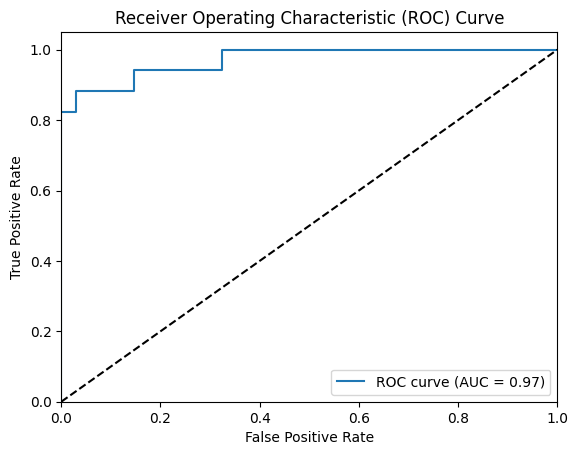

In [14]:
# Define the feature and target
X = test_df_q5[["ratio_PWM"]]  # Feature column for PWM ratio
y = test_df_q5["Group"].map(
    {"Negative": 0, "Positive": 1}
)  # Convert string labels to numerical values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc:.3f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

Q10:


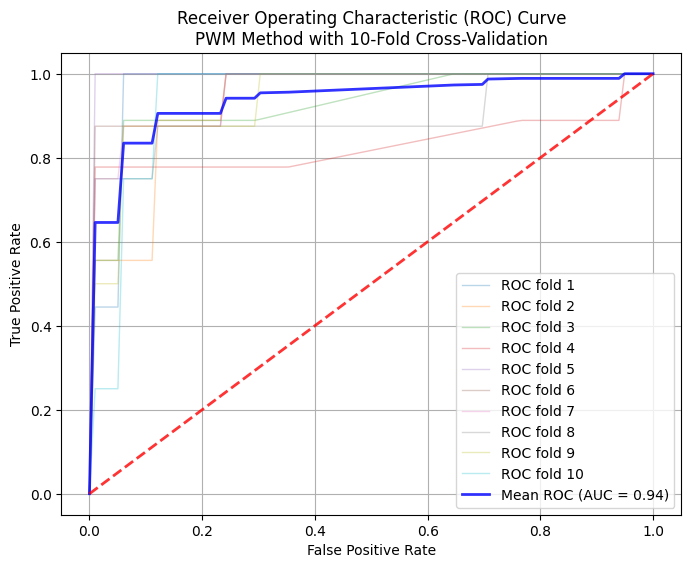

Mean AUC: 0.938 (+/- 0.044)


In [15]:
# Define the feature and target
X = test_df_q5[["ratio_PWM"]]  # Feature column for PWM method
y = test_df_q5["Group"].map(
    {"Negative": 0, "Positive": 1}
)  # Convert string labels to numerical values

# Initialize 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store AUC scores and ROC curves
aucs = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Perform 10-fold cross-validation
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate AUC
    auc = roc_auc_score(y_test, y_probs)
    aucs.append(auc)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# Plot ROC curves for each iteration
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(mean_fpr, tprs[i], lw=1, alpha=0.3, label=f"ROC fold {i+1}")

# Calculate and plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = roc_auc_score(y, model.predict_proba(X)[:, 1])
plt.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    lw=2,
    alpha=0.8,
    label=f"Mean ROC (AUC = {mean_auc:.2f})",
)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(
    "Receiver Operating Characteristic (ROC) Curve\nPWM Method with 10-Fold Cross-Validation"
)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Mean AUC: {np.mean(aucs):.3f} (+/- {np.std(aucs):.3f})")

Q11:


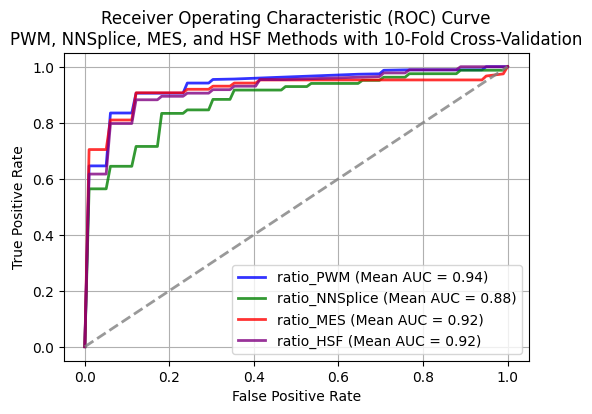

ratio_PWM - Mean AUC: 0.938 (+/- 0.044)
ratio_NNSplice - Mean AUC: 0.880 (+/- 0.071)
ratio_MES - Mean AUC: 0.921 (+/- 0.074)
ratio_HSF - Mean AUC: 0.923 (+/- 0.048)


In [16]:
# Define the features and target
methods = ["ratio_PWM", "ratio_NNSplice", "ratio_MES", "ratio_HSF"]
X = test_df_q5[methods]  # Feature columns for all methods
y = test_df_q5["Group"].map(
    {"Negative": 0, "Positive": 1}
)  # Convert string labels to numerical values

# Initialize 10-fold cross-validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store AUC scores and ROC curves for each method
aucs = {method: [] for method in methods}
mean_fpr = np.linspace(0, 1, 100)
tprs = {method: [] for method in methods}

# Perform 10-fold cross-validation for each method
for method in methods:
    for i, (train_index, test_index) in enumerate(
        kf.split(X[method].values.reshape(-1, 1), y)
    ):
        X_train, X_test = X.iloc[train_index][[method]], X.iloc[test_index][[method]]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Predict probabilities
        y_probs = model.predict_proba(X_test)[:, 1]

        # Calculate AUC
        auc = roc_auc_score(y_test, y_probs)
        aucs[method].append(auc)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs[method].append(interp_tpr)

# Plot ROC curves for each method
plt.figure(figsize=(6, 4))
colors = ["blue", "green", "red", "purple"]
for method, color in zip(methods, colors):
    mean_tpr = np.mean(tprs[method], axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs[method])
    plt.plot(
        mean_fpr,
        mean_tpr,
        color=color,
        lw=2,
        alpha=0.8,
        label=f"{method} (Mean AUC = {mean_auc:.2f})",
    )

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="gray", alpha=0.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(
    "Receiver Operating Characteristic (ROC) Curve\nPWM, NNSplice, MES, and HSF Methods with 10-Fold Cross-Validation"
)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

for method in methods:
    print(
        f"{method} - Mean AUC: {np.mean(aucs[method]):.3f} (+/- {np.std(aucs[method]):.3f})"
    )

<div dir="rtl">
לפי הניתוח והאנליזה, הממוצע הכי גבוה הוא של PWM עם AUC של 0.94, מה שמצביע על כך שהוא המודל הטוב
ביותר לניבוי האם מוטציה היא חיובית או שלילית. PWM עולה על MES ו-HSF (עם AUC של 0.92) ועל NNSplice
(עם AUC של 0.88). לכן, ניתן להמליץ להשתמש ב-PWM לניבוי מדויק יותר בהשוואה לשיטות האחרות.
</div>